Name: Addison Zheng

### Lab - Machine Learning
In this notebook, you will use the Gaussian Naive Bayes estimator to perform and evaluate a binary classification.  You will also compare the performance of this algorithm to other classification algoritms.

This is the Breast Cancer Wisconsin Diagnostic dataset that is bundled with scikit-learn

https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html#sklearn.datasets.load_breast_cancer

The dataset contains 569 samples, each with 30 features and a label indicating whether a tumor was malignant (0) or benign (1). There are only two labels, so this dataset is commonly used to perform binary classification. 

Using this dataset, reimplement the steps of this chapter’s classification case study in Sections 15.2–15.3.
* Use the GaussianNB (short for Gaussian Naive Bayes) estimator. 
* When you execute multiple classifiers (as in Section 15.3.3) to determine which one is best for the Breast Cancer Wisconsin Diagnostic dataset, include a LogisticRegression classifier in the estimators dictionary. Logistic regression is another popular algorithm for binary classification.  Use the following parameters: 

    ```
    solver='lbfgs', multi_class='ovr', max_iter=10000
    ```

**Implement the following steps/tasks. Clearly document each step with markup descriptions. (HINT: look at the steps in the book from 15.2.2-15.3.3)**
* Load the data
* Display the data description
* Check the sample and target sizes
* Split the data for training and testing
* Create the model (GaussianNB)
* Train the model
* Predict
* Determine accuracy with score
* Determine accuracy with confusion matrix
* Determine accuracy with classification report
* Visualize the confusion matrix
* Perform k-fold cross validation
* Run multiple models to find the best one, include GaussianNB, KNeighborsClassifier, LogisticRegression, and SVC.
* Which classifer performs the best?







Loading the data from sklearn

In [5]:
from sklearn.datasets import load_breast_cancer

#load the data
data = load_breast_cancer()


Displaying the data

In [6]:
#Display data discription
print(data.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

Checking the sample and target size

In [7]:
#Checking sample
print(data.target[::100])
#Checking target size
print(data.data.shape)

[0 0 1 0 0 1]
(569, 30)


Spliting the data for training and testing

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( data.data, data.target, random_state=11)

Creating the model

In [9]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

Train the model

In [10]:
knn.fit(X=X_train, y=y_train)

KNeighborsClassifier()

Predict

In [11]:
predicted = knn.predict(X=X_test)
expected = y_test
print(predicted[:20])
print(expected[:20])

wrong = [(p, e) for (p, e) in zip(predicted, expected) if p != e]
print(f"Accuracy: {(y_test.shape[0]-len(wrong))/y_test.shape[0]:.2%}")

[0 0 0 0 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 0]
[0 0 0 0 0 1 0 1 1 1 1 0 1 1 1 1 0 1 1 0]
Accuracy: 94.41%


Determine Accuracy with Score

In [12]:
print(f'Prediction: {knn.score(X_test, y_test):.2%}')
print(f'Full Data: {knn.score(data.data, data.target):.2%}')

Prediction: 94.41%
Full Data: 94.02%


Determine accuracy with confusion matrix

In [13]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_true=expected, y_pred=predicted)
confusion

array([[43,  7],
       [ 1, 92]], dtype=int64)

Visualize the confusion matrix

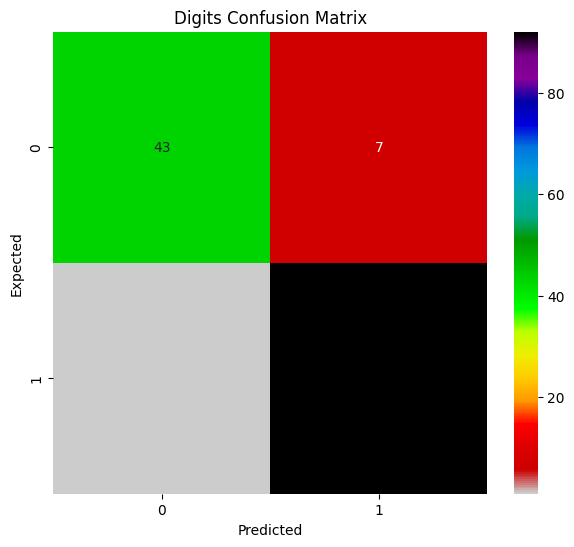

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

confusion_df = pd.DataFrame(confusion, index=range(2), columns=range(2))

figure = plt.figure(figsize=(7, 6))
axes = sns.heatmap(confusion_df, annot=True, 
                   cmap=plt.cm.nipy_spectral_r) 

# Augmented parts
axes.set(xlabel='Predicted', ylabel='Expected', title='Digits Confusion Matrix')
plt.show()

Determine accuracy with classification report

In [15]:
from sklearn.metrics import classification_report
names = [str(digit) for digit in data.target_names]
print(classification_report(expected, predicted, target_names=names))

              precision    recall  f1-score   support

   malignant       0.98      0.86      0.91        50
      benign       0.93      0.99      0.96        93

    accuracy                           0.94       143
   macro avg       0.95      0.92      0.94       143
weighted avg       0.95      0.94      0.94       143



Perform k-fold cross validation

In [16]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

kfold = KFold(n_splits=10, random_state=11, shuffle=True)
scores = cross_val_score(estimator=knn, X=data.data, y=data.target, cv=kfold)
print(f'Mean accuracy: {scores.mean():.2%}')

Mean accuracy: 92.79%


Run multiple models to find the best one, include GaussianNB, KNeighborsClassifier, LogisticRegression, and SVC.

In [19]:
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

estimators = {
    'KNeighborsClassifier': knn, 
    #'SVC': SVC(gamma='scale'),
    'SVC': SVC(),
    'GaussianNB': GaussianNB(),
    'LogisticRegression': LogisticRegression(solver='lbfgs', multi_class='ovr', max_iter=10000),
    'DecisionTree': tree.DecisionTreeClassifier(),
    'RandomForest': RandomForestClassifier(n_estimators=10)
    }

for estimator_name, estimator_object in estimators.items():
    kfold = KFold(n_splits=10, random_state=11, shuffle=True)
    scores = cross_val_score(estimator=estimator_object, 
        X=data.data, y=data.target, cv=kfold)
    print(f'{estimator_name:>20}: ' + 
          f'mean accuracy={scores.mean():.2%}; ' +
          f'standard deviation={scores.std():.2%}')

KNeighborsClassifier: mean accuracy=92.79%; standard deviation=2.01%
                 SVC: mean accuracy=91.92%; standard deviation=3.52%
          GaussianNB: mean accuracy=93.85%; standard deviation=2.75%
  LogisticRegression: mean accuracy=95.08%; standard deviation=3.02%
        DecisionTree: mean accuracy=91.74%; standard deviation=3.61%
        RandomForest: mean accuracy=94.90%; standard deviation=2.14%


Which classifer performs the best?

The classifier that performed the best is LogisticRegression because it had an accuracy of 95.08% and a standard deviation of 3.02% making it the classifier with the highest accuracy and one of the higher standard deviations.